# COGS 118A - Final Project

# TODO: Predicting diabetes and pre/diabetes

## Group members

- Haokai Mao
- Zhilin Kong
- Kai Yeung
- Haixin Chen

# Abstract (Need to updated)
**Our goal is to predict whether a patient is likely to have diabetes , prediabetes or be healthy. We are using the data set from the kaggle website. The data set was built by 441,445 individuals and has features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses. The participants are all anonymous and keep their privacy.We will use SVM to perform the classification tasks(i.e., detecting diabetes). We first begin feature selection to reduce the dimensionality of the data, which can improve the performance of the SVM. Then, we split the data to train the SVM model. Next, we evaluate the performance of the trained SVM on the testing set using metrics such as accuracy, precision, recall, and F1-score. Finally, we optimize the SVM by doing a randomized search.**

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

The dataset is originally from CDC 2015 BRFSS.(CDC2015)*[[^CDC2015]](https://www.cdc.gov/brfss/annual_data/annual_2015.html)* BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world. The survey will collect data related behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.

Before conducting this research with our dataset, we found that most of the other classification program always uses one single algorithm to predict the result. Hence, we decide to use majority vote ensemble to combine the result from multiple algorithms, and try to find if it can predict a better result. Therefore, we conducted some preliminary research by using Google and visiting CDC websites to identify how we can determine if a person has diabetes or not. We also looked into the symptoms of diabetes.

We would like to confirm whether the information we gathered aligns with our dataset. Specifically, we want to know if factors such as high blood pressure (HighBP) and high cholesterol (HighCol) are related to diabetes or not. We will use majority voting for our three different models to predict the classifier.

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.(CDC)*[[^CDC]](https://www.cdc.gov/diabetes/basics/diabetes.html)*

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.(CDC)*[[^CDC]](https://www.cdc.gov/diabetes/managing/index.html)*


We would like to classify people who have diabetes or prediabetes or are healthy. There are 1 in diabetics and 8 in prediabetes who do not know they have problems. Type II diabetes is the most common form. Diabetes will bring much financial impact to America.

# Problem Statement

**Diabetes Prediction: In this project, the goal is to predict whether a patient is likely to develop diabetes or not. Our goal contains three states: no diabetes, prediabetes, and diabetes. The input data includes various features such as age, BMI, blood pressure, and glucose level. An SVM model will be trained based on this data and then perform a multiclassification on patients.**

# Data

- link: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
- Number of variables: 22
- Number of observations: 253680
- An observation consists of:
  
  'Diabetes' : 0 = no diabetes, 1 = prediabetes, 2 = diabetes; 
  
  'HighBP' : 0 = no high, BP 1 = high BP;
  
  'HighChol' : 0 = no high cholesterol, 1 = high cholesterol;
  
  'CholCheck' : 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years; 
  
  'BMI' :Body Mass Index;
  
  'Smoker' : Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes;
  
  'Stroke' : (Ever told) you had a stroke. 0 = no 1 = yes;
  
  'HeartDiseaseorAttack' : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes; 
  
  'PhysActivity' : physical activity in past 30 days(not including job). 0 = no 1 = yes; 
  
  'Fruits' : Consume Fruit 1 or more times per day 0 = no 1 = yes; 
  
  'Veggies' : Consume Vegetables 1 or more times per day 0 = no 1 = yes;
  
  'HvyAlcoholConsump' :Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes; 
  
  'AnyHealthcare' : ;Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes;
  
  'NoDocbcCost' : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes;
  
  'GenHlth' : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor;
  
  'MentHlth' : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days;
  
  'PhysHlth' : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days; 
  
  'DiffWalk' : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes;
  
  'Sex': 0 = female 1 = male;
  
  'Age' : 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older; 
  
  'Education' : Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate);
  
  'Income' : Income scale (INCOME2 see codebook) scale 1-8: 1 = less than 10,000 dollars, 5 = less than 35,000 dollars, 8 = 75,000 dollars or more.


- what some critical variables are, how they are represented
  
  **For representations of variables, please see the above explanations. Critical variables: 'Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age'.** 


- any special handling, transformations, cleaning, etc will be needed
  
  **We will drop the uncritical variables to reduce the dimensionality of the SVM model and hence improve efficiency and performance.** 


# Proposed Solution

### Solution:

We decide to use three different algorithms to train 3 IID models, SVM, Logistic Regression and KNN. Then apply majority vote ensemble to output the final result.

#### Data Preprocessing:

1. Merge two datasets
2. Remove invalid values
3. Split into training and testing by 8:2 ratio. In this step we will use "Train_test_split"

#### Training the SVM Model:

1. We create SVM classifier and use grid search with cross-validation to identify the best hyperparameters.  
   In this step we will use "Pipeline", "GridSearchCV" and "SVC".
2. Choose one kernel function. We will try several kernel functions but probably radial basis function will be the best choice.  
   The reason is it works well in high dimensional space, and our data is not linearly separable since our variables are mostly binary.
3. Train the SVM model on training dataset.

#### Training the Logistic Regression Model:

1. We use grid search to find the best hyperparameter 'C'. 
2. To make sure it does not exceed the max iteration, we set max iter = 1000.
3. Train the LR model on the training dataset.

#### Training the KNN Model:

1. We also use grid search to find the best hyperparameter "n_neightbors"
2. Train the KNN model on the training dataset.

#### Training the Random Forest Model:

1. We use grid search to find the best hyperparameter 'C'.
2. Train the Random Forest model on the training dataset.

#### We apply majority vote ensemble to output the final result

1. Get the output from three different models, we output the result that at least two model agrees.

#### Increase Sensitivity
1.After we apply those algorithms (the code at the end of the notebook), we found that our dataset is unbalanced (i.e the negative is much more than positive). Which made our model always predict negative (i.e sensitivity too low, only around 0.14!). We will use different approach in different models. In SVM and Logisitic Regression, we will use class_weight = "balanced" to add weight to the positive datas, and in Knn, we will use a technicque called oversampling, which uses the positive cases several times, until our dataset is balanced, and to make it more sensitive.  
2.We will also improve our evaluate metric, details are in the below section.

For the packages, we will use sklearn:
- Train_test_split
- Pipeline
- GridSearchCV
- SVC
- KNeighborsClassifier
- LogisticRegression
- RandomOverSampler
- RandomForestClassifier
- Warning (ignore future warnings to provide a better look)

#### Why our solution might work:

SVM can handle large feature spaces and non-linear decision boundaries. Also, by using cross-validation, we can reduce the chance of overfitting to ensure the model can generalize well. 
Also, Logistic Regression and KNN are also good classifiers, we combine three of them to get the final output.

# Evaluation Metrics

### Main Idea
- We already split our data in to training and testing datasets, we use our models to predict the result and for each of them, we calculate the Accuracy, Precision, Recall and F1score to get an confusion matrix. 
- We will use accuracy_score(), preision_score(), recall_score(), and f1_score() from sklearn. 
- Finally, after we use majority vote, we will calculate those scores again. And check is the accuracy score close to our estimate. We can use the formula 1-Sum(k>n/2 to n)(n choose k)errorRate^k (1-errorRate)^(n-k)

#### Probabily we need to increase the Sensitivity
- We found that our dataset is imbalance dataset. Most of the cases are negative. So we may need to consider use a different evaluation metric , For example sensitivity TP/(TP+FN)
- Since we are using this model to detact a sick, then false negative is expensive. We want to increase the model's sensitivity.
- We can do it by adjust the decision threshold, we can lower the threshold to classify more unsure cases as positive.

# Import Packages And Data

In [1]:
#!pip install imblearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
diabetesBinary = pd.read_csv("data/DiabetesBinary.csv")

# Results (delete after we done the real result -- Kai)

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Results (Real)

## Subsection 1 --- DataCleaning & EDA

Subsection 1 shows the data cleaning and the distribution of the data. 

**We started with a very unbalanced dataset (i.e. very little data for prediabetes and diabetes and very much data without diabetes), which resulted in all our models not getting a desired result, or the result was very skewed. We have tried to solve this problem with the "imblearn" package, but the result is not satisfactory. So finally we decided to use the balanced dataset "diabetesBinary" provided on kaggle to complete our task.**

Renaming dataset, removes any NaN, and reset the dataframe's index

In [2]:
#Renaming the "Diabetes_binary" column in the original diabetesBinary DataFrame to "Diabetes".
diabetesBinaryRenamed = diabetesBinary.rename(columns={"Diabetes_binary": "Diabetes"})

#Removes any rows with missing values (NaN) and use "diabetes" as new dataframe's name.
diabetes = diabetesBinaryRenamed.dropna()

#Reset the dataframe's index.
diabetes = diabetes.reset_index()

#result = diabetes[diabetes["Diabetes"] == 1]
#print(result)

print the dataset's summary statistics, including count, mean, standard deviation, minimum, quartiles, and maximum.

In [3]:
diabetes.describe()

,index,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253679.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Show the distribution of data for each variable by using seaborn.

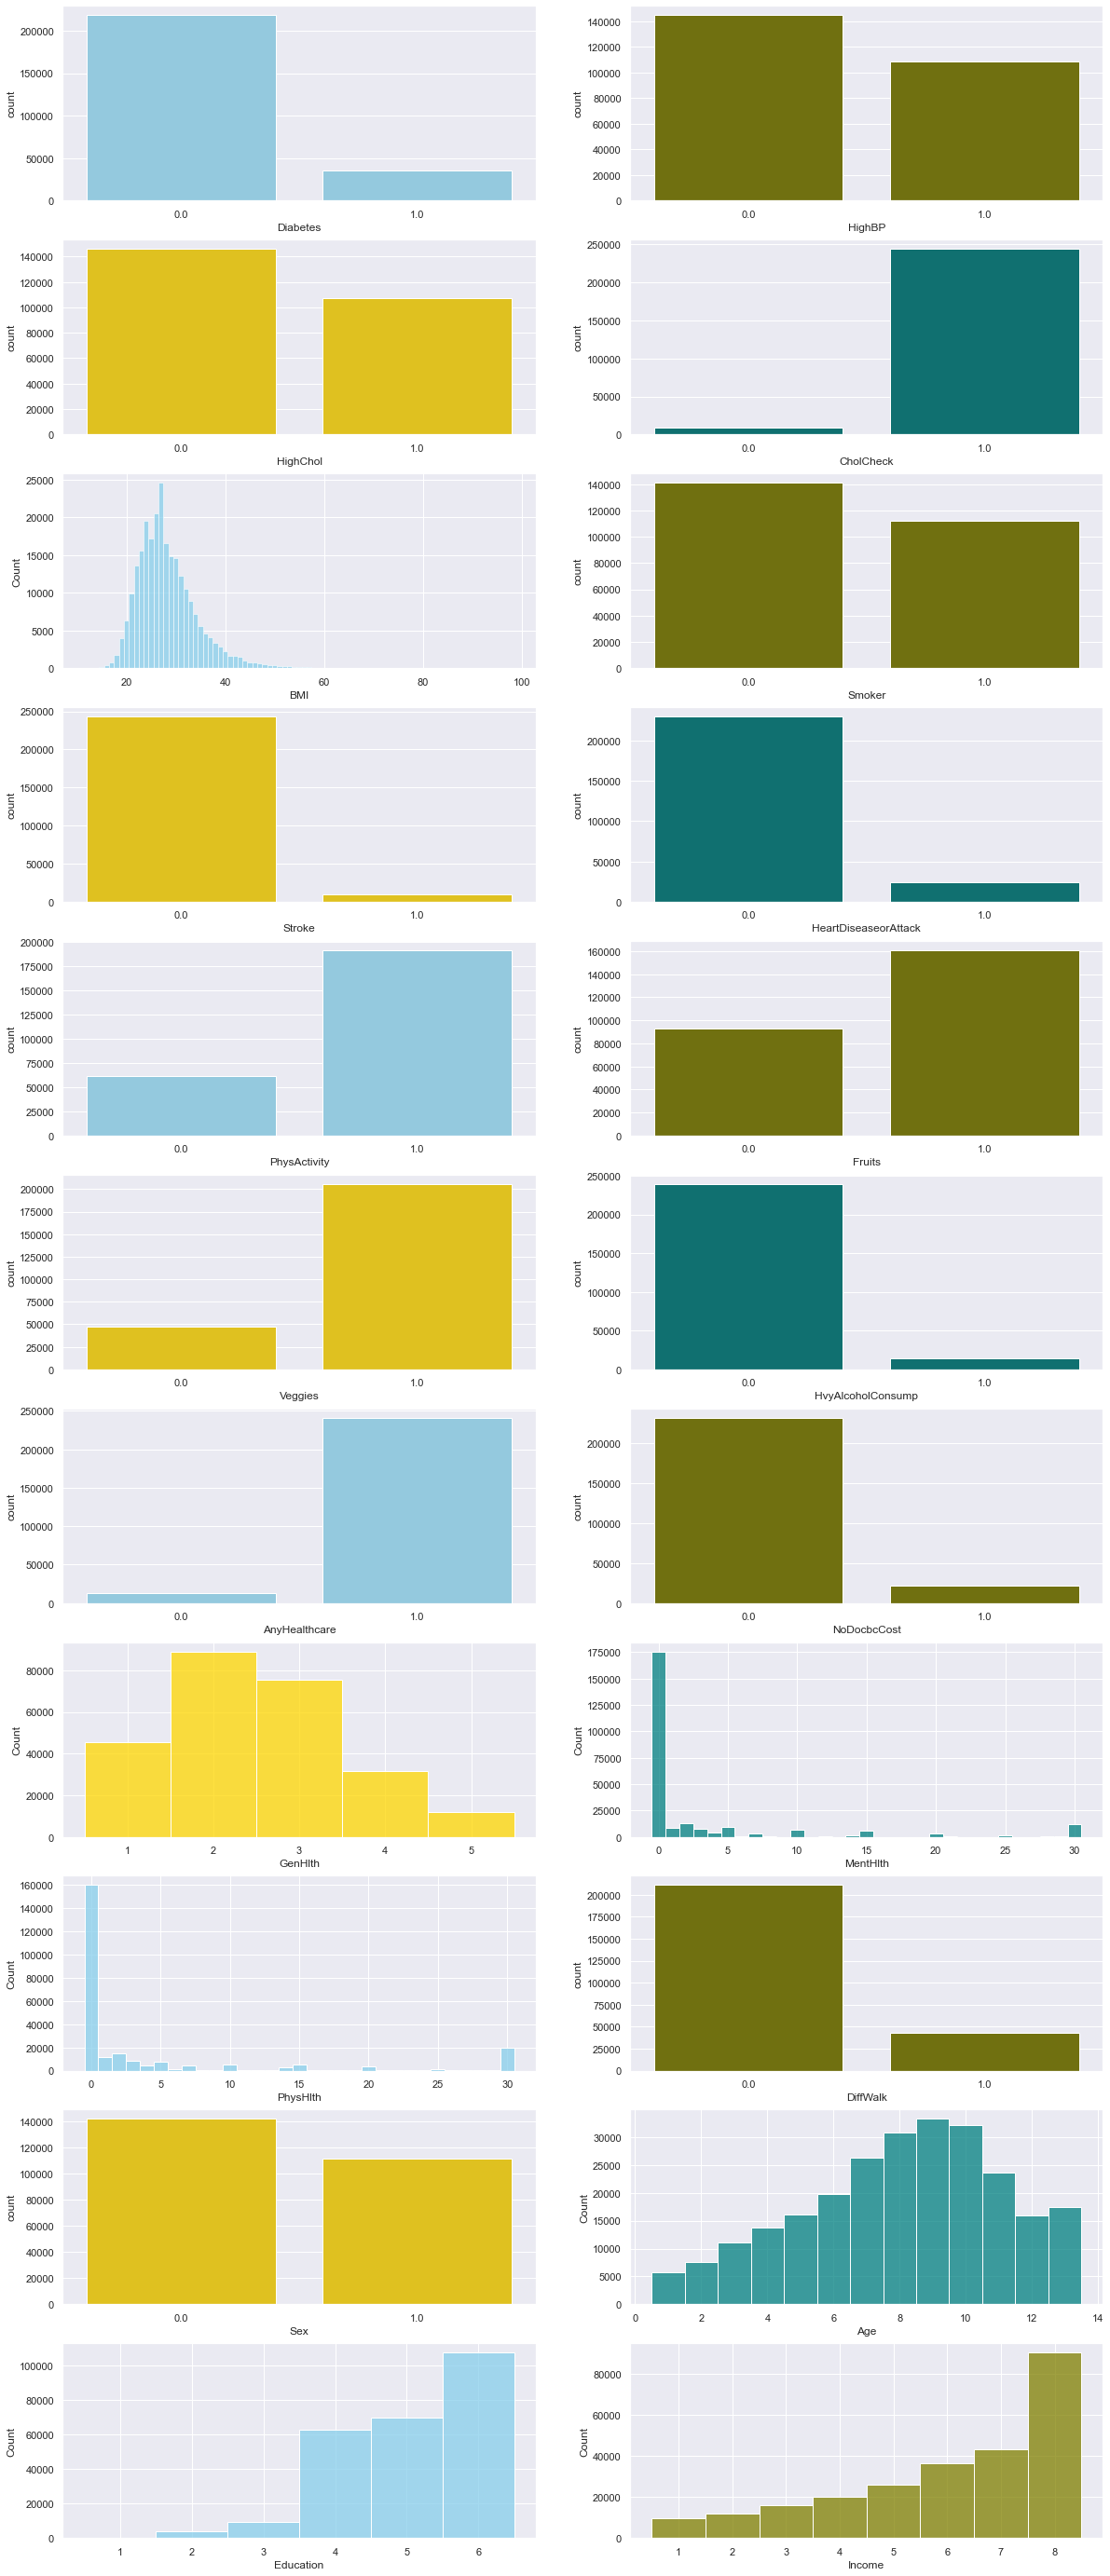

In [4]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(11, 2, figsize=(20, 50))

sns.countplot(data=diabetes, x="Diabetes", color="skyblue", ax=axs[0, 0])
sns.countplot(data=diabetes, x="HighBP", color="olive", ax=axs[0, 1])
sns.countplot(data=diabetes, x="HighChol", color="gold", ax=axs[1, 0])
sns.countplot(data=diabetes, x="CholCheck", color="teal", ax=axs[1, 1])
sns.histplot(data=diabetes, x="BMI", discrete=True, color="skyblue", ax=axs[2, 0])
sns.countplot(data=diabetes, x="Smoker", color="olive", ax=axs[2, 1])
sns.countplot(data=diabetes, x="Stroke", color="gold", ax=axs[3, 0])
sns.countplot(data=diabetes, x="HeartDiseaseorAttack", color="teal", ax=axs[3, 1])
sns.countplot(data=diabetes, x="PhysActivity", color="skyblue", ax=axs[4, 0])
sns.countplot(data=diabetes, x="Fruits", color="olive", ax=axs[4, 1])
sns.countplot(data=diabetes, x="Veggies", color="gold", ax=axs[5, 0])
sns.countplot(data=diabetes, x="HvyAlcoholConsump", color="teal", ax=axs[5, 1])
sns.countplot(data=diabetes, x="AnyHealthcare", color="skyblue", ax=axs[6, 0])
sns.countplot(data=diabetes, x="NoDocbcCost", color="olive", ax=axs[6, 1])
sns.histplot(data=diabetes, x="GenHlth",discrete=True, color="gold", ax=axs[7, 0])
sns.histplot(data=diabetes, x="MentHlth",discrete=True, color="teal", ax=axs[7, 1])
sns.histplot(data=diabetes, x="PhysHlth", discrete=True, color="skyblue", ax=axs[8, 0])
sns.countplot(data=diabetes, x="DiffWalk", color="olive", ax=axs[8, 1])
sns.countplot(data=diabetes, x="Sex", color="gold", ax=axs[9, 0])
sns.histplot(data=diabetes, x="Age",discrete=True, color="teal", ax=axs[9, 1])
sns.histplot(data=diabetes, x="Education",discrete=True, color="skyblue", ax=axs[10, 0])
sns.histplot(data=diabetes, x="Income",discrete=True, color="olive", ax=axs[10, 1])

plt.show()

Changing the diabetes data from "0, 1, 2" to a human-readable format makes it easier for the reader to know the results in the subsequent confusion matrices.

In [5]:
diabetes = diabetes.drop(columns=['index'])
diabetes.reset_index()
diabetes.Diabetes = diabetes.Diabetes.astype(int)
diabetes.Diabetes = diabetes.Diabetes.replace({0:'no_diabetes' , 1: 'pre/diabetes', 2: 'diabetes'})
diabetes.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no_diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,no_diabetes,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,no_diabetes,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,no_diabetes,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,no_diabetes,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Subsection 2 --- Feature Selection & Train-test Split

**We drop the "Diabetes" column because this is our target variable. The rest of the dropping column are less relevant compared to other factors based on the EDA part. "AnyHealthcare","NoDocbcCost","Veggies" have an very extreme distribution and hence we dropped it to avoid unnecessary interference and calculations. Although "Fruits","Sex","Smoker" have an approximately even distribution, they do not directly contribute to diabetes, which can be considered as confounding factors, and hence we dropped it.** 

In [6]:
diabetes = diabetes.sample(random_state = 888, n = 10000)
X = diabetes.drop(columns=["Diabetes","AnyHealthcare","NoDocbcCost","Fruits","Sex","Smoker","Veggies"])
y = diabetes['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

## Subsection 3 --- Train SVM Model & Output Predict And Proba

TODO: How and why

In [7]:
X_train_RS, y_train_RS = RandomUnderSampler(sampling_strategy = "auto", random_state = 88).fit_resample(X_train,y_train)
y_train_RS.value_counts()

no_diabetes     1133
pre/diabetes    1133
Name: Diabetes, dtype: int64

In [8]:
warnings.filterwarnings('ignore')
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
onehot = OneHotEncoder()
scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)])

pipe = Pipeline([('make_features', preprocessor),('classifier', SVC(max_iter=10000, probability = True))])
search_space = [    {'classifier__kernel': ['linear'],
     'classifier__C': [0.001,0.005,0.01,0.05,0.1,0.5, 1]
    },
#     {'classifier__kernel': ['poly'],
#      'classifier__gamma': [0.001,0.0031623,0.01,0.031623,0.1,0.31623],
#      'classifier__degree': range(2,5),
#      'classifier__C': [0.01, 0.1, 1]
#     },
    {'classifier__kernel': ['rbf'],
     'classifier__gamma': [0.001,0.005,0.01,0.05,0.1,0.5],
     'classifier__C': [0.01]
    }
]

SVM_model = GridSearchCV(pipe, search_space, cv=5)
SVM_model.fit(X_train_RS, y_train_RS);
predSVM = SVM_model.predict(X_test)
predProbSVM = SVM_model.predict_proba(X_test)
senSVM = recall_score(y_test, predSVM,pos_label = "pre/diabetes")
accSVM = accuracy_score(y_test, predSVM)
print(SVM_model.best_params_)
# print(classification_report(y_test, predSVM))
print("accuracy",accSVM)
print("sensitivity",senSVM)

{'classifier__C': 0.005, 'classifier__kernel': 'linear'}
accuracy 0.7175
sensitivity 0.8163934426229508


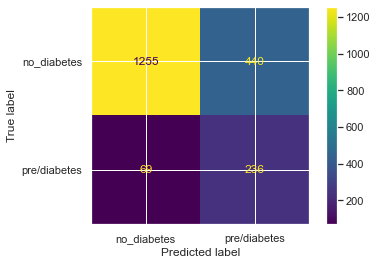

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, predSVM);

## Subsection 4 --- Train Logistic Regression Model & Output

**By undersampling the dominant class, we can address the issue of imbalanced class. This logistic model ensures that it learns from a balanced dataset. The optimum hyperparameters for the logistic regression model are also found using grid search and cross-validation, which helps to prevent overfitting and enhance generalization performance on the test data.**

In [9]:
X_train_RS, y_train_RS = RandomUnderSampler(sampling_strategy = "auto", random_state = 88).fit_resample(X_train,y_train)
y_train_RS.value_counts()
model = LogisticRegression(max_iter = 1000)
para = {"C": [0.005,0.01,0.1,1,10,100,1000]}
LR_model = GridSearchCV(model,para,cv = 5)
LR_model.fit(X_train_RS, y_train_RS)

predLR = LR_model.predict(X_test)
predProbLR = LR_model.predict_proba(X_test)

senLR = recall_score(y_test, predLR, pos_label = "pre/diabetes")
accLR = accuracy_score(y_test, predLR)
print(LR_model.best_params_)
print("accuracy",accLR)
print("sensitivity",senLR)

{'C': 1}
accuracy 0.7395
sensitivity 0.780327868852459


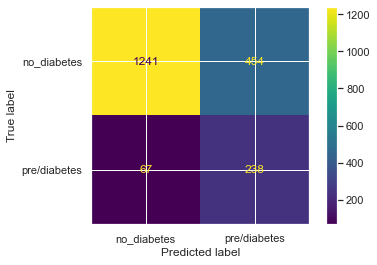

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, predLR);

## Subsection 5 --- Train KNN Model & Output

**Again,by undersampling the dominant class, we can address the issue of imbalanced class. This KNN model ensures that it learns from a balanced dataset. The optimum hyperparameters for the KNN regression model are also found ({'metric': 'manhattan', 'n_neighbors': 350}) using grid search and cross-validation, which helps to prevent overfitting and enhance generalization performance on the test data.**

In [10]:
X_train_RS, y_train_RS = RandomUnderSampler(sampling_strategy = "auto", random_state = 88).fit_resample(X_train,y_train)
y_train_RS.value_counts()
para = {"n_neighbors": [50, 100, 150, 200, 250, 300, 350, 400, 450], "metric": ["minkowski","manhattan"]}
model = KNeighborsClassifier()

KNN_model = GridSearchCV(model,para,cv = 5)
KNN_model.fit(X_train_RS,y_train_RS)

predKNN = KNN_model.predict(X_test)
predProbKNN = KNN_model.predict_proba(X_test)
    
accKNN = accuracy_score(y_test, predKNN)
senKNN = recall_score(y_test, predKNN,pos_label = "pre/diabetes")
print(KNN_model.best_params_)
print("accuracy",accKNN)
print("sensitivity",senKNN)

{'metric': 'manhattan', 'n_neighbors': 350}
accuracy 0.709
sensitivity 0.7573770491803279


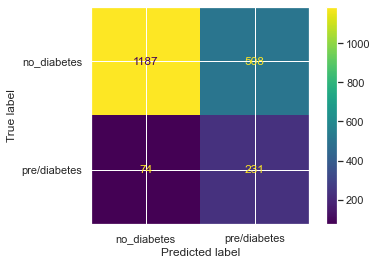

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, predKNN);

## Subsection 6 --- Train Random Forest Model & Output

**Again,by undersampling the dominant class, we can address the issue of imbalanced class. This Random Forest model ensures that it learns from a balanced dataset. The optimum hyperparameters for the Random Forest regression model are also found ({'max_depth': 20, 'n_estimators': 100}) using grid search and cross-validation, which helps to prevent overfitting and enhance generalization performance on the test data.**

In [11]:
X_train_RS, y_train_RS = RandomUnderSampler(sampling_strategy = "auto", random_state = 88).fit_resample(X_train,y_train)
y_train_RS.value_counts()
model = RandomForestClassifier(class_weight={"no_diabetes":1,"pre/diabetes":40});
para = {"n_estimators": [50, 100, 200],"max_depth":[10,20,30,40,None]}
RF_model = GridSearchCV(model,para,cv = 5)
RF_model.fit(X_train_RS, y_train_RS)

predRF = RF_model.predict(X_test)
predProbRF = RF_model.predict_proba(X_test)

accRF = accuracy_score(y_test, predRF)
senRF = recall_score(y_test, predRF,pos_label = "pre/diabetes")
print(RF_model.best_params_)
print("accuracy",accRF)
print("sensitivity",senRF)

{'max_depth': 20, 'n_estimators': 100}
accuracy 0.6925
sensitivity 0.780327868852459


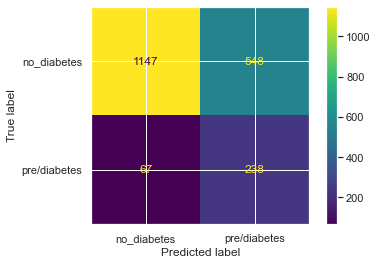

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, predRF);

## Subsection 7 --- Ensemble (Both Hard & Soft Voting)

**We implemented an ensemble classifier using hard voting based on the predictions made by previously trained models: Support Vector Machine, Logistic Regression, k-Nearest Neighbors, and Random Forest.** 

**We first use hard voting, i.e., every individual classifier votes for a class, and the majority wins. The reason is hard voting can leverage the advantages of the several classifiers to enhance the model's overall performance. We only use the predicted class labels from the individual classifiers, and the threshold is more than half of the classifiers need to agree on a class label.**

In [12]:
predEnsemble = predSVM
for i in range(predSVM.size):
    count = 0
    if predSVM[i] == "pre/diabetes":
        count+=1
    if predLR[i] == "pre/diabetes":
        count+=1
    if predKNN[i] == "pre/diabetes":
        count+=1
    if predRF[i] == "pre/diabetes":
        count+=1
    if count>=3:
        predEnsemble[i] = "pre/diabetes"
    else:
        predEnsemble[i] = "no_diabetes"

hardAcc = accuracy_score(y_test, predEnsemble)
hardSens = recall_score(y_test, predEnsemble, pos_label = "pre/diabetes")
print("accuracy",hardAcc)
print("sensitivity",hardSens)

accuracy 0.7455
sensitivity 0.7737704918032787


**We repeat the process but using soft voting this time. The ensemble classifier produces a prediction based on all individual classifiers' estimated probabilities. The class label with the highest total probability is then determined by the ensemble. Compared to har voting, soft voting offers additional details about the accuracy of each classifier's prediction, which may improve ensemble performance. Also, we set the threshold for the sum of probabilities for the "no diabetes" class to 2.05 in the given code, and the threshold can be changed to balance the trade-off between recall and accuracy.**

In [13]:
size = predProbSVM.shape[0]
ensembleProbs = np.zeros(size)
softVotePreds = np.empty(size,dtype = "object")

for i in range(size):
    total = predProbSVM[i][0] + predProbLR[i][0] + predProbKNN[i][0] + predProbRF[i][0]
    ensembleProbs[i] = total

for i in range(size):
    if ensembleProbs[i]>=2.05:
        softVotePreds[i] = "no_diabetes"
    else:
        softVotePreds[i] = "pre/diabetes"
        
SoftAcc = accuracy_score(y_test, softVotePreds)
SoftSens = recall_score(y_test, softVotePreds, pos_label = "pre/diabetes")
print("accuracy",SoftAcc)
print("sensitivity",SoftSens)

accuracy 0.719
sensitivity 0.8


## Subsection 8 --- Evaluate & Final Decision

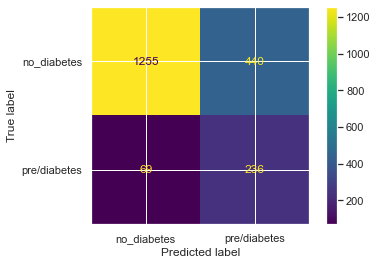

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, predEnsemble);

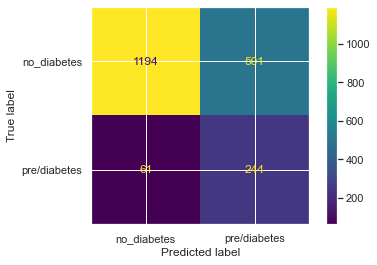

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, softVotePreds);

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

**Data Collection**

  - Kaggle is the sole source of datasets we utilize. We check the data to make sure there are no concerns with terms of use or personal information. The data consists just of a few physical variables and contains no trade secrets.

  - In order to prevent the publication of sensitive personal information, we additionally make sure that datasets containing sensitive personal information lack any personal identifiers. Moreover, we confirm that this dataset was gathered responsibly and in accordance with applicable privacy laws, including gaining the participants' informed permission.

**Data Storage**

  - It's crucial to retain the data securely in order to preserve patient privacy, including employing encryption and access restrictions to thwart illegal access. It is also vital to create ethical norms for the usage of the data. Because we are utilizing Kaggle's dataset, we can ignore this section for now.

**Data Analysis and Modeling**

  - If the dataset used to train the SVM algorithm is not representative of the larger population, this might lead to biased results that may unfairly harm some groups. Graphs, such as scatter plots, will be used in the study to look for any outliers that cannot be explained rationally. So, we may carefully choose and prepare the data to reduce the possibility of bias and thoroughly assess the model's performance to make sure it does not show any unfair or damaging biases. Hence, in order to minimize prejudice, we need routinely review the data to spot any potential biases in advance and correct them as soon as possible. Finally, it's important to communicate the results of the analysis clearly and transparently, providing insights that are both accurate and understandable to audiences. 

**Reproducibility and replicability**

  - This project will have good reproducibility and replicability because we will clearly write every steps.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.